# Importing the Dependencies

In [181]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from xgboost import XGBRegressor     

In [182]:
calories = pd.read_csv('calories.csv')

In [183]:
calories.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [184]:
exercise = pd.read_csv('exercise.csv')

In [185]:
exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Combining the two DataFrames

In [186]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [188]:
# checking number of rows and columns
calories_data.shape

(15000, 9)

### Data Description

In [189]:
# getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### Data Preprossing

In [190]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

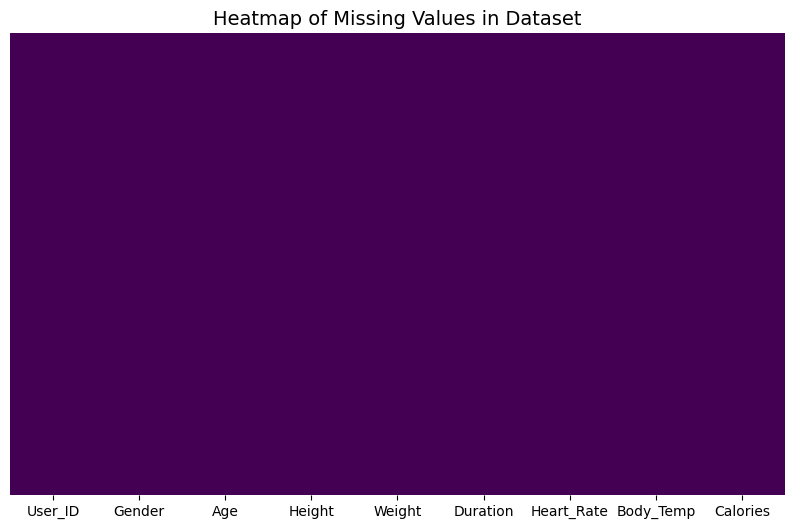

In [191]:
#Heatmap of Missing Values in Dataset

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap showing missing values
sns.heatmap(calories_data.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# Add title
plt.title("Heatmap of Missing Values in Dataset", fontsize=14)

# Show the plot
plt.show()


In [192]:
#converting categorical data into Non-categorical data
calories_data['Gender'] = calories_data['Gender'].map({'male':1, 'female':0})
calories_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data Analysis

In [193]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Data Visualization

<Axes: xlabel='count', ylabel='Gender'>

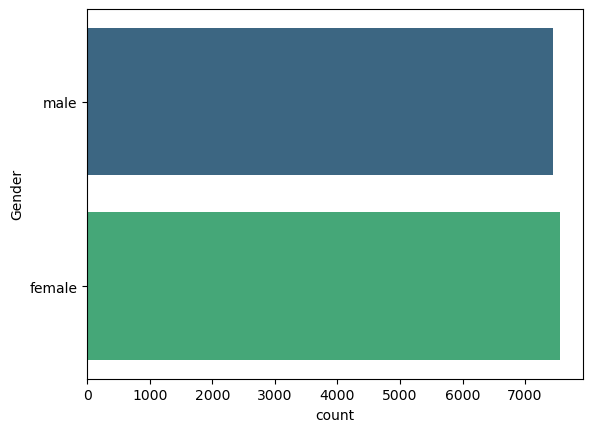

In [194]:
# plotting the gender column in count plot
sns.countplot(exercise['Gender'], palette='viridis')

In [195]:
# counting number of male and female
calories_data['Gender'].value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

## Checking For Outliers

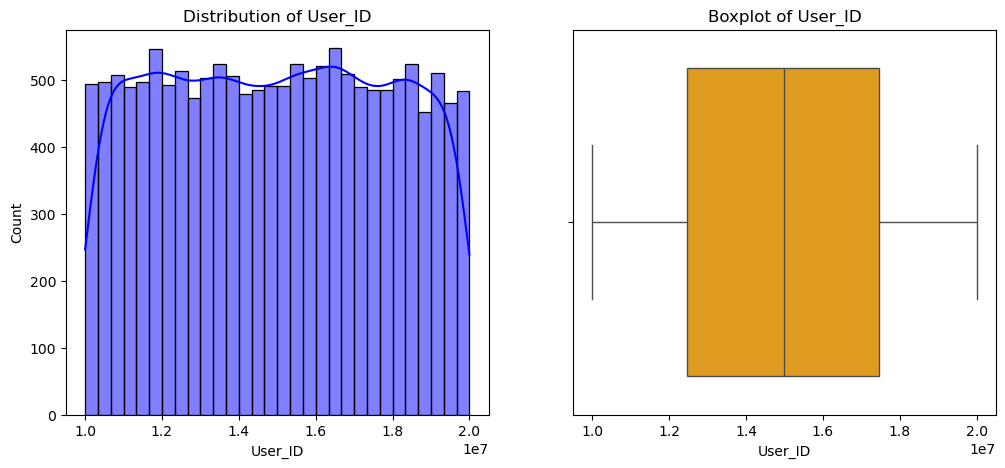

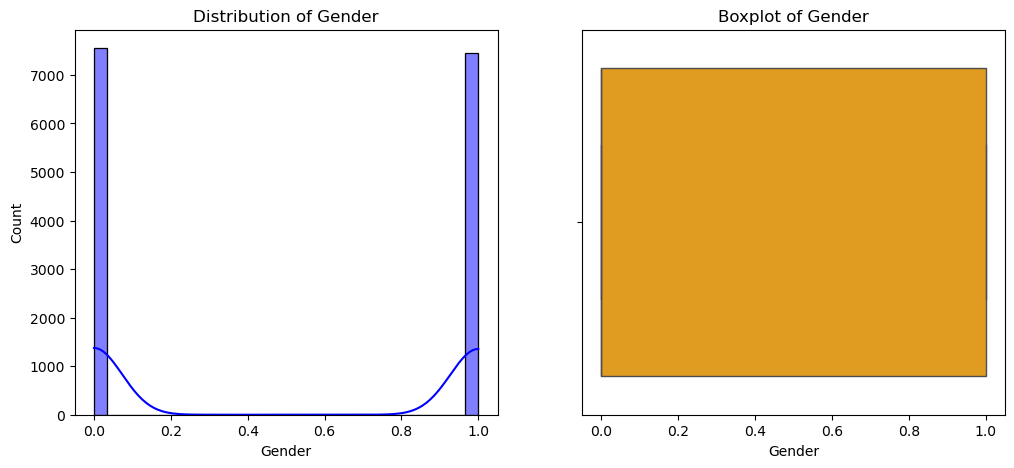

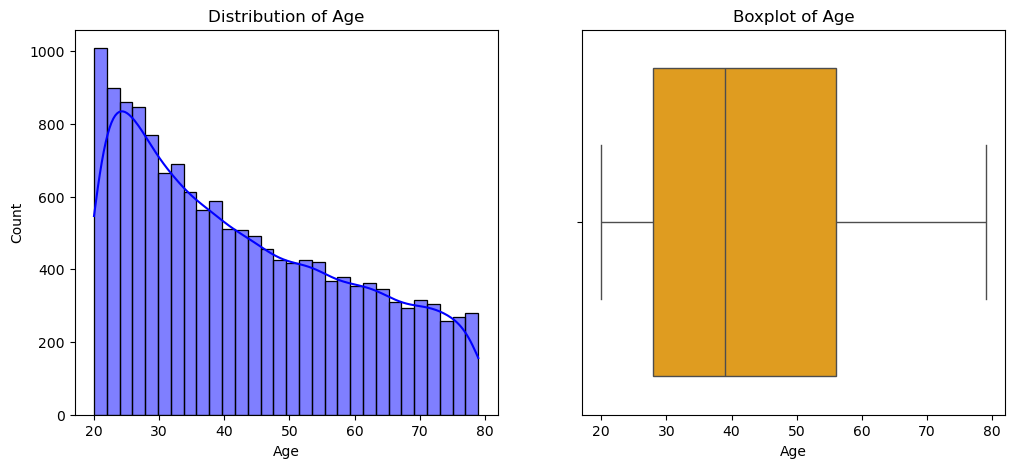

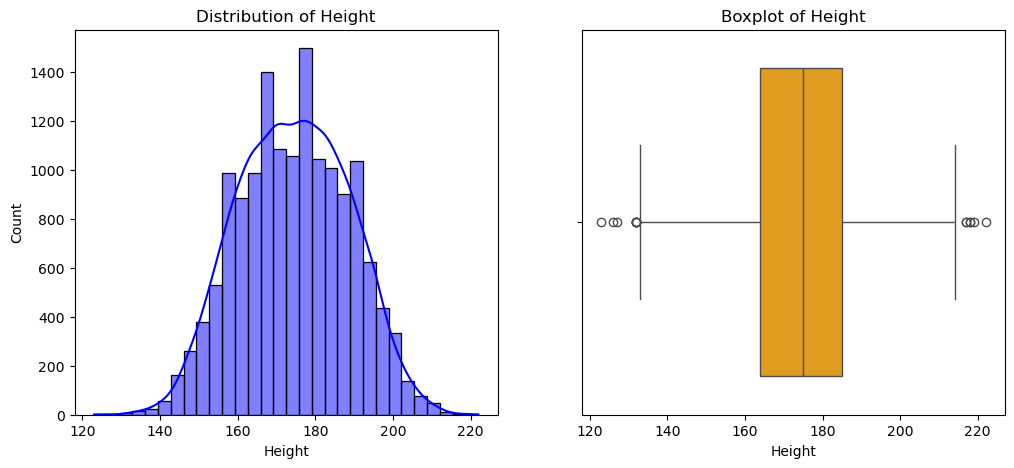

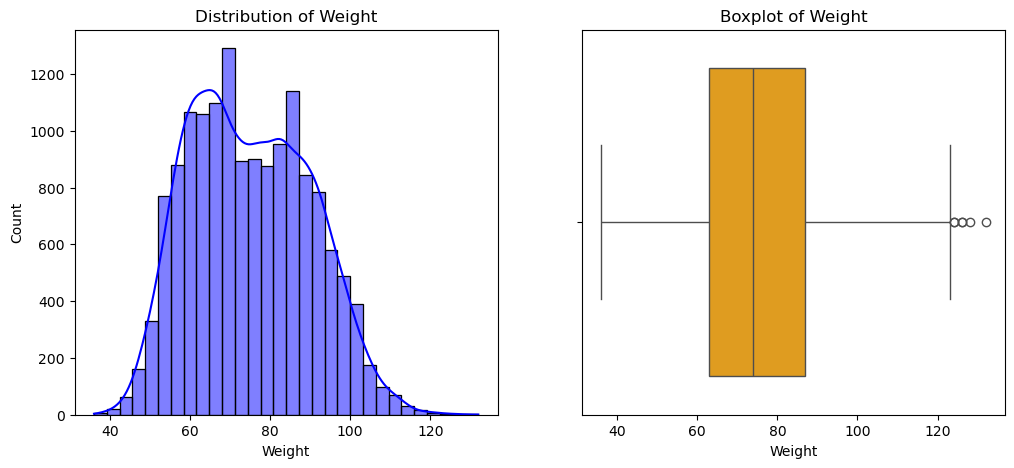

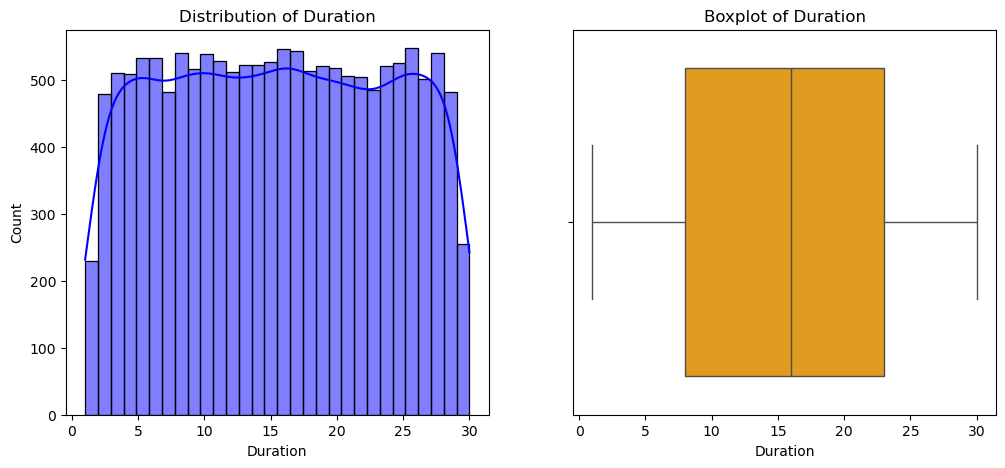

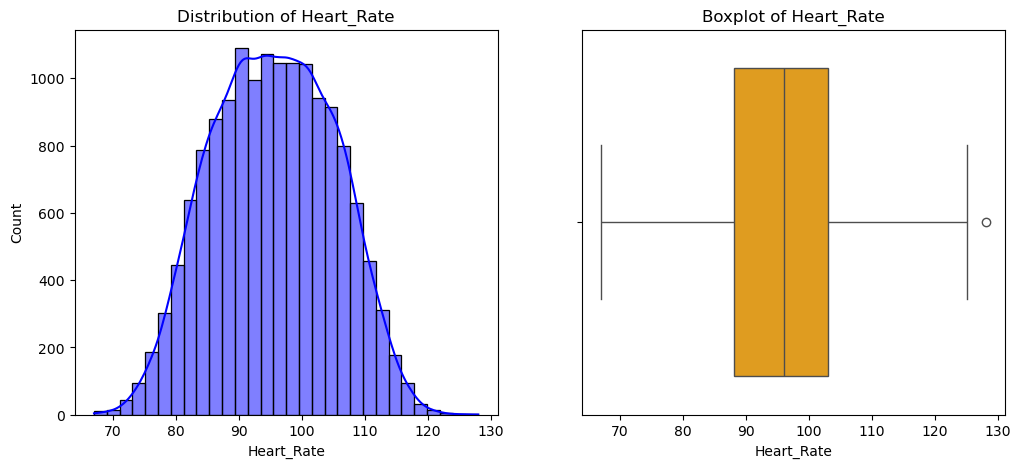

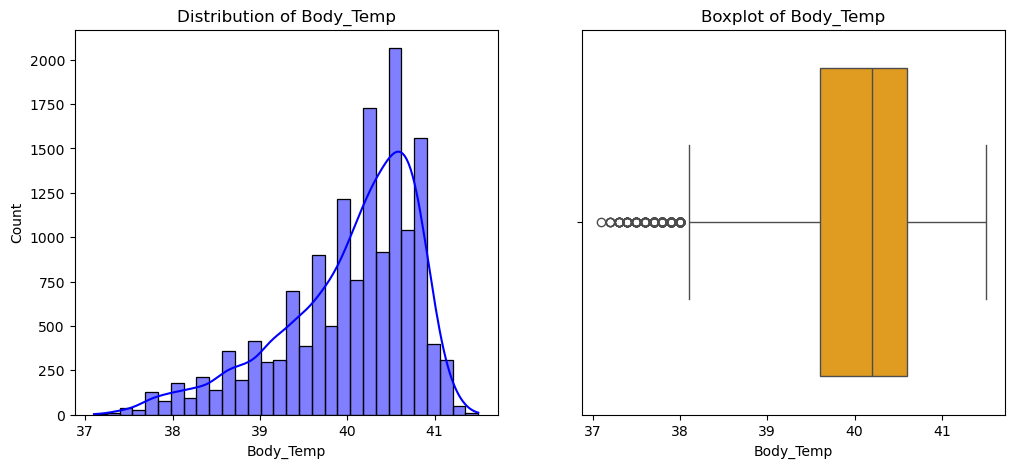

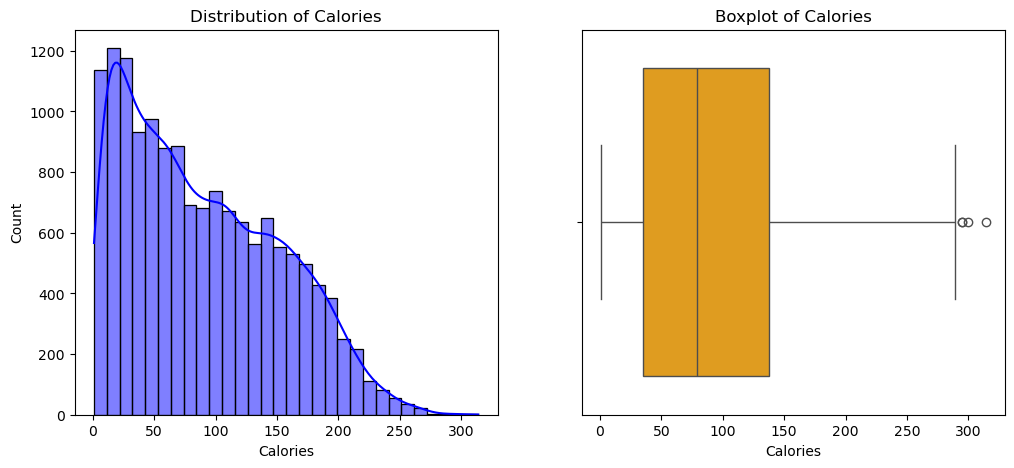

In [ ]:


def plot_distribution_and_boxplot(data):
    """Plots distribution and boxplot for all numerical columns in the dataset."""
    numerical_columns = data.select_dtypes(include=['number']).columns  # Select only numeric columns

    for col in numerical_columns:
        plt.figure(figsize=(12, 5))

        # Distribution Plot
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, bins=30, color="blue")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col], color='orange')
        plt.title(f"Boxplot of {col}")

        # Show plots
        plt.show()

# Call the function on the dataset
plot_distribution_and_boxplot(calories_data)


## Handling Possible Outliers 

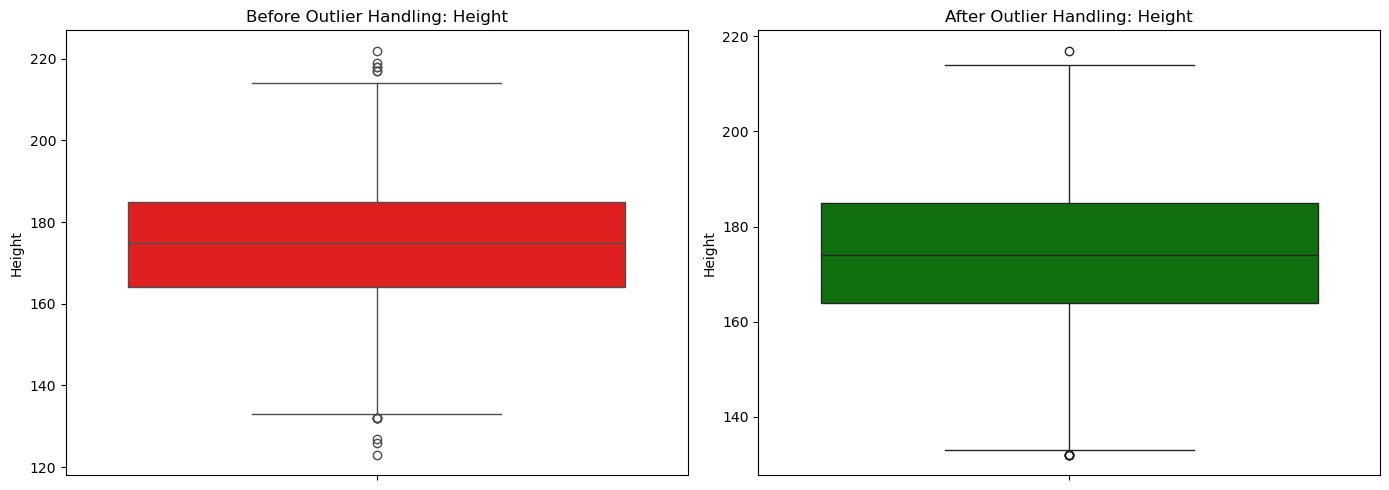

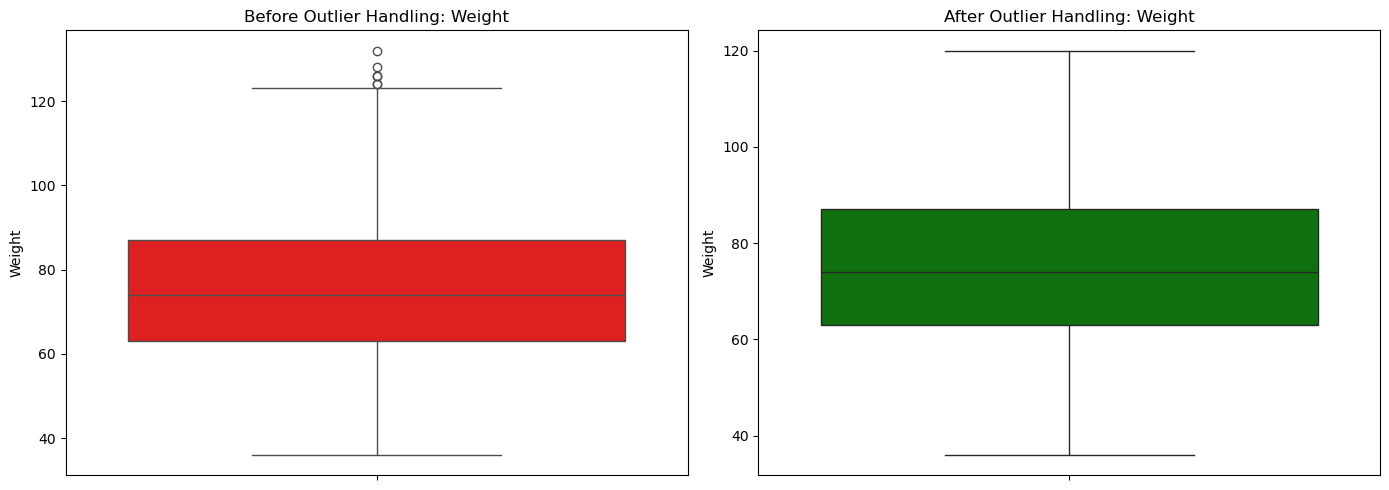

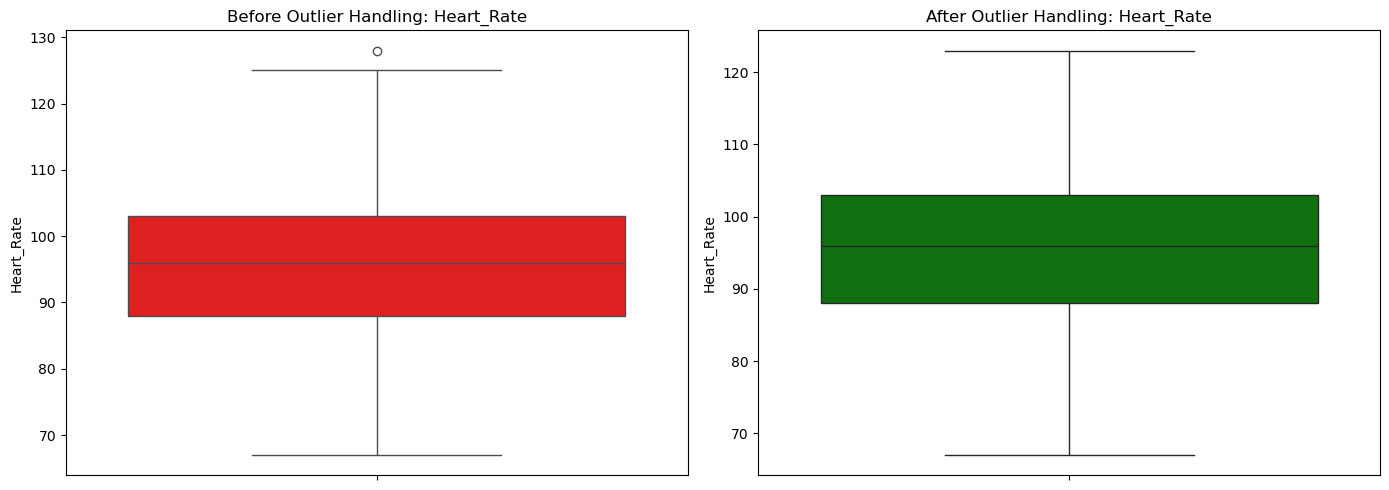

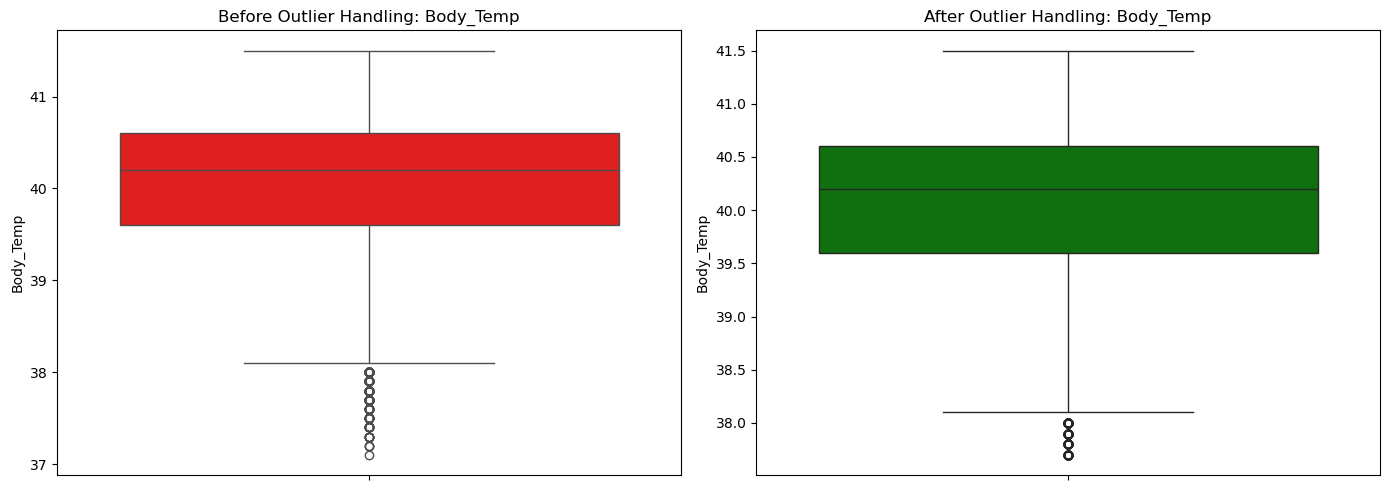

Outliers handled successfully using Z-score! ✅


In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# List of columns to apply Z-score outlier removal
columns_to_clean = ["Height", "Weight", "Heart_Rate", "Body_Temp"]

# Function to plot Box Plots before and after outlier handling
def plot_boxplots(before_data, after_data, columns):
    """Plots Box Plots before and after outlier handling side by side for selected numerical columns."""
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Before Outlier Handling
        sns.boxplot(y=before_data[col], ax=axes[0], color="red")
        axes[0].set_title(f"Before Outlier Handling: {col}")
        axes[0].set_ylabel(col)
        
        # After Outlier Handling
        sns.boxplot(y=after_data[col], ax=axes[1], color="green")
        axes[1].set_title(f"After Outlier Handling: {col}")
        axes[1].set_ylabel(col)
        
        plt.tight_layout()
        plt.show()

# Removing Outliers using Z-score for selected columns only
filtered_data = calories_data[(np.abs(zscore(calories_data[columns_to_clean])) < 3).all(axis=1)]

# Visualize Box Plots before and after handling outliers
plot_boxplots(calories_data, filtered_data, columns_to_clean)

print("Outliers handled successfully using Z-score! ✅")


## Finding Correlation in the dataset

In [198]:
#finding correlation with target attribute

# Compute correlation matrix
correlation_matrix = calories_data.corr()

# target attribute is 'Calories'
target_correlation = correlation_matrix["Calories"].sort_values(ascending=False)

# Display correlation values
print(target_correlation)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64


In [199]:
correlation = calories_data.corr()

<Axes: >

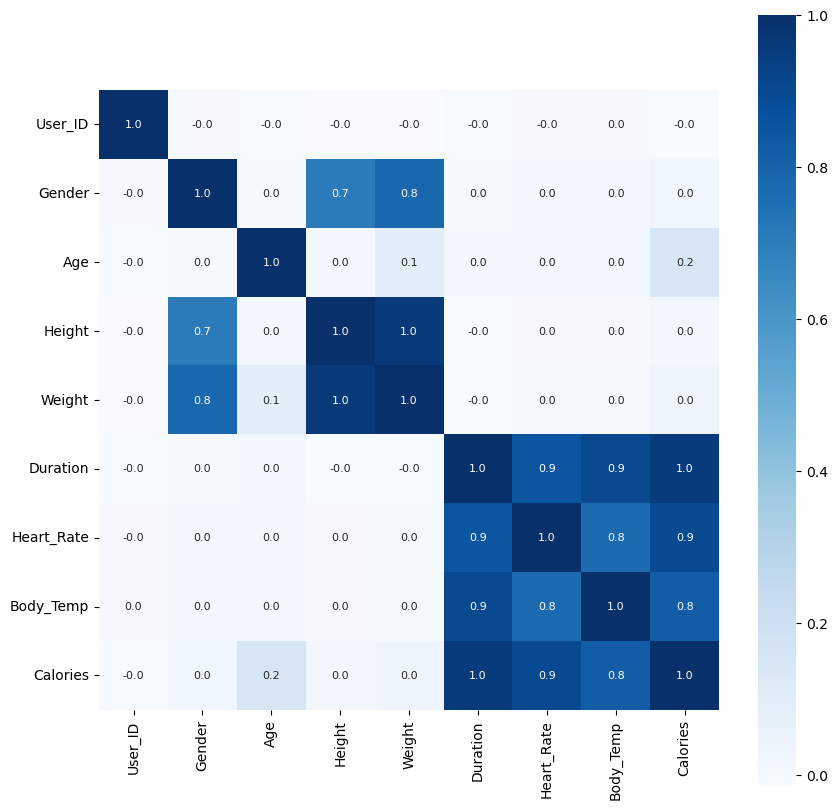

In [200]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

## Separating features and Target

In [201]:
# Splitting dataset into features (X) and target variable (y)
X = calories_data.drop(['User_ID', 'Calories'], axis=1)  # Features
y = calories_data['Calories'] # Target variable

In [202]:
X.shape
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [203]:
y.shape
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


## Splitting the data into Traning data and Test data

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
X_train.shape

(12000, 7)

X_test.shape

## Traning Model

In [207]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error

In [208]:
calories_data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)
calories_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [209]:
print(X_train.isnull().sum())

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In [ ]:
# Define different regression models
models = {
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(),
    'Lasso Regression':Lasso(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor()''
}    

Linear Regression: MSE = 132.00, R² Score = 0.97
Ridge Regression: MSE = 132.00, R² Score = 0.97
Lasso Regression: MSE = 143.83, R² Score = 0.96
Decision Tree: MSE = 28.38, R² Score = 0.99
Random Forest: MSE = 7.09, R² Score = 1.00


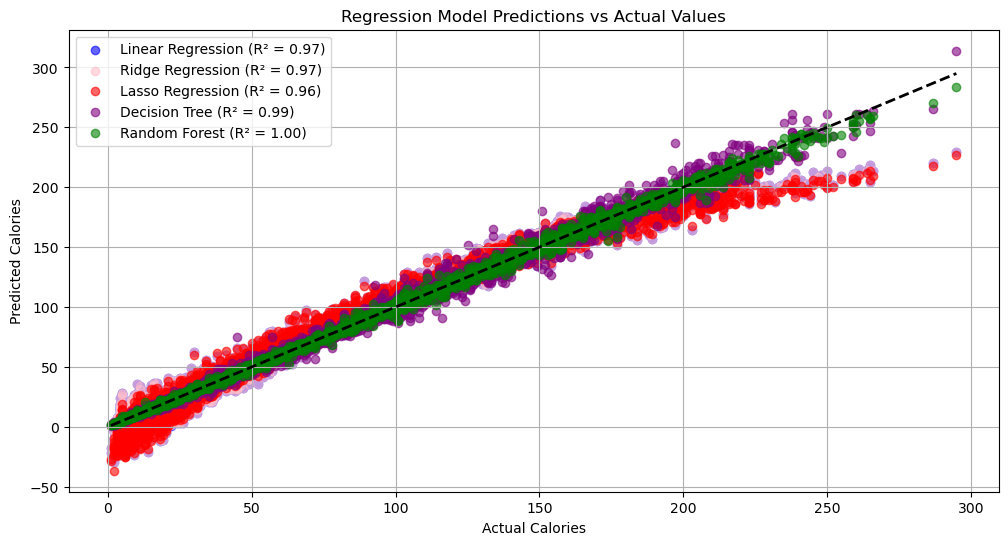

Regression model evaluation completed!


In [211]:
# Define colors for each model
colors = ["blue", "pink", "red", "purple", "green"]

plt.figure(figsize=(12, 6))
# Train and evaluate each model
for (name, model), color in zip(models.items(), colors):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on test data
    
    # Compute performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Ensure this is defined before using

    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, y_pred, label=f'{name} (R² = {r2:.2f})', alpha=0.6, color=color)

    # Print model performance metrics
    print(f"{name}: MSE = {mse:.2f}, R² Score = {r2:.2f}")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect fit line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Regression Model Predictions vs Actual Values")
plt.legend()
plt.grid(True)  # Improve readability
plt.show()

print("Regression model evaluation completed!")

## Comparison of Model Accuracy

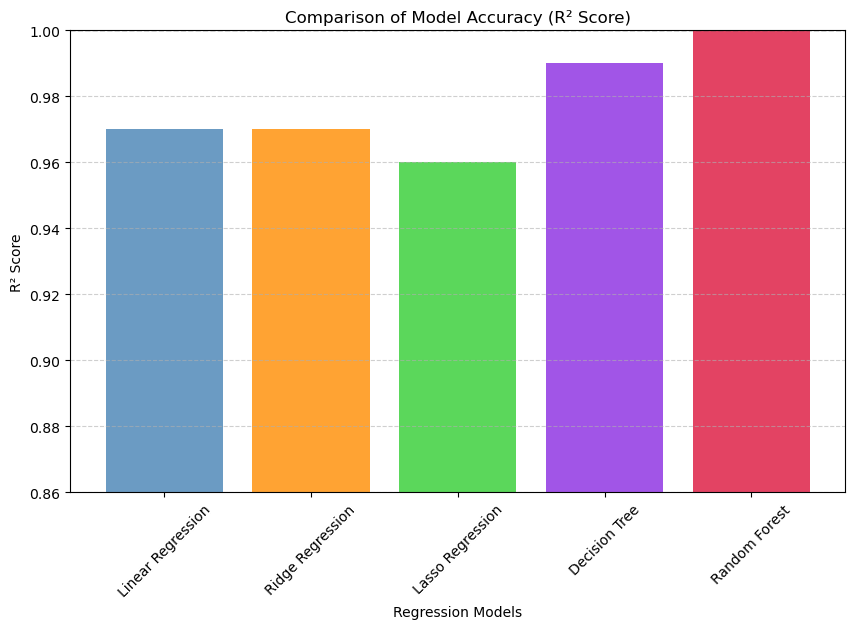

In [212]:
import matplotlib.pyplot as plt

r2_scores = {
    "Linear Regression": 0.97,
    "Ridge Regression": 0.97,
    "Lasso Regression": 0.96,
    "Decision Tree": 0.99,
    "Random Forest": 1.00
}

# Define a list of unique colors for models
colors = ['#4682B4', '#FF8C00', '#32CD32', '#8A2BE2', '#DC143C', '#FFD700', '#00CED1']  # Blue, Orange, Green, Purple, Red, Gold, Cyan

# Assign colors dynamically
model_names = list(r2_scores.keys())  # Get model names
model_colors = {name: colors[i % len(colors)] for i, name in enumerate(model_names)}  # Cycle through colors

# Plot bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores.values(), color=[model_colors[name] for name in model_names], alpha=0.8)

# Reference line for perfect R²
plt.axhline(y=1, color='#555555', linestyle='--', linewidth=1)  

# Labels and Title
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Comparison of Model Accuracy (R² Score)")

# Adjust y-axis for better visualization
plt.ylim([min(r2_scores.values()) - 0.1, 1])  

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


### Comparison of Model Accuracy (R² Score)

#### High R² Score = Better model performance

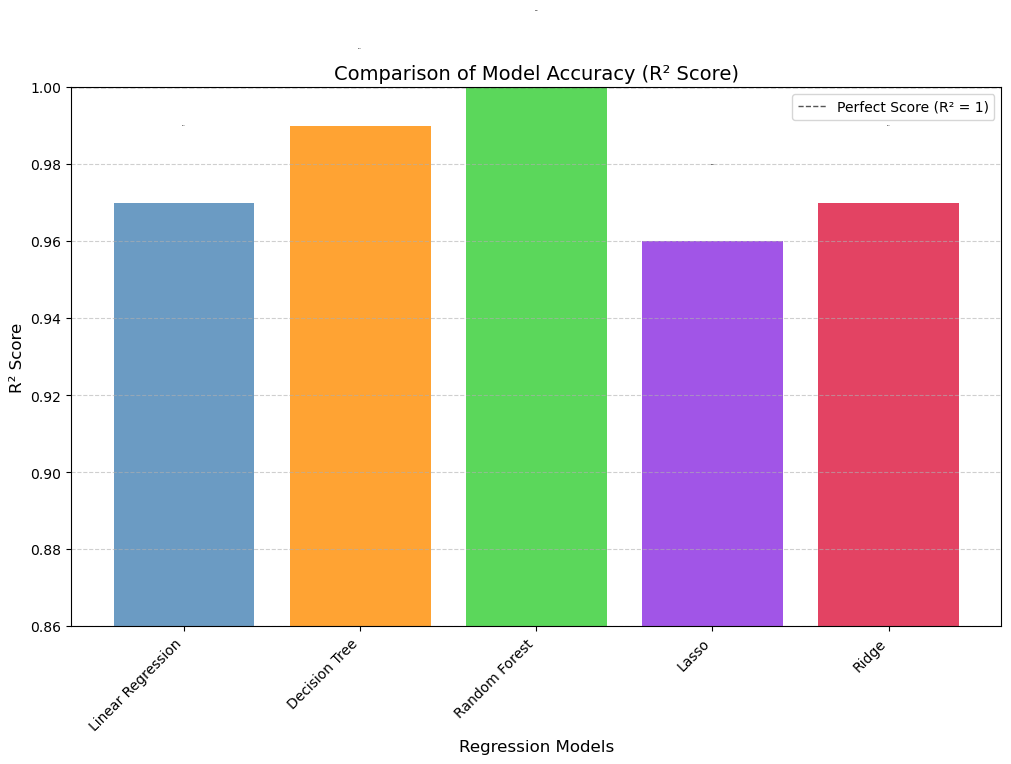

In [213]:
import matplotlib.pyplot as plt

# Example dictionary of R² scores 
r2_scores = {
    "Linear Regression": 0.97,
    "Decision Tree": 0.99,
    "Random Forest": 1.00,
    "Lasso": 0.96,
    "Ridge": 0.97
}

# Define a list of unique colors for models
colors = ['#4682B4', '#FF8C00', '#32CD32', '#8A2BE2', '#DC143C']  # Blue, Orange, Green, Purple, Red

# Assign colors dynamically
model_names = list(r2_scores.keys())
model_colors = {name: colors[i % len(colors)] for i, name in enumerate(model_names)}  # Cycle through colors

# Plot bar chart with different colors
plt.figure(figsize=(12, 7))
plt.bar(model_names, r2_scores.values(), color=[model_colors[name] for name in model_names], alpha=0.8)

# Reference line for perfect R²
plt.axhline(y=1, color='#555555', linestyle='--', linewidth=1, label="Perfect Score (R² = 1)")

# Labels and Title
plt.xlabel("Regression Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("Comparison of Model Accuracy (R² Score)", fontsize=14)

# Adjust y-axis for better visualization
y_min = max(min(r2_scores.values()) - 0.1, 0)  # Prevent negative lower bounds
plt.ylim([y_min, 1])

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with their R² values
for i, (name, score) in enumerate(r2_scores.items()):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=0, fontweight='bold')

# Show legend
plt.legend()

# Show plot
plt.show()


### Comparison of Model Accuracy (MSE)
#### Lower MSE = Better model performance

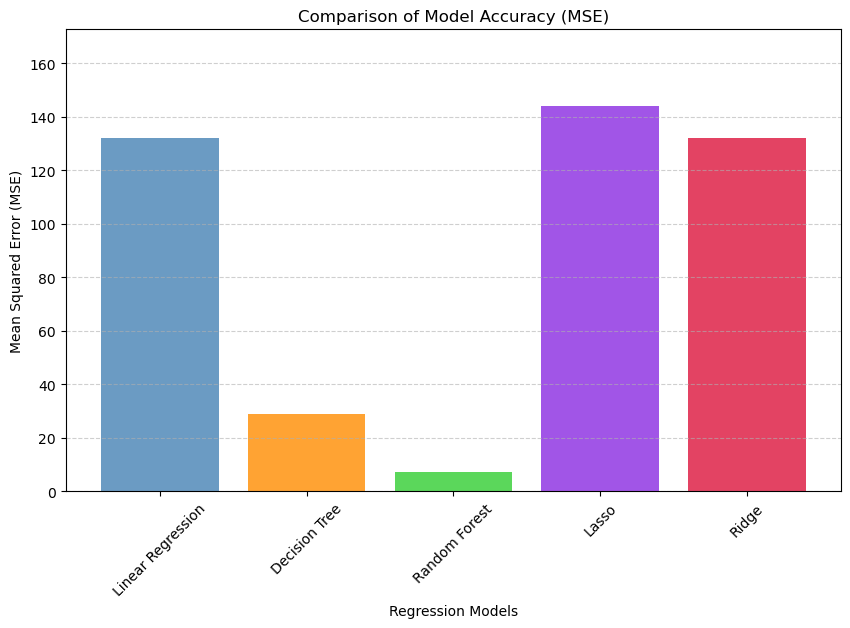

In [214]:
import matplotlib.pyplot as plt

mse_scores = {
    "Linear Regression": 132.00,
    "Decision Tree": 28.87,
    "Random Forest": 7.19,
    "Lasso": 143.83,
    "Ridge": 132.00
}


# Define unique colors for models
colors = ['#4682B4', '#FF8C00', '#32CD32', '#8A2BE2', '#DC143C']  # Blue, Orange, Green, Purple, Red
# Assign colors dynamically
model_names = list(mse_scores.keys())  # Get model names
model_colors = {name: colors[i % len(colors)] for i, name in enumerate(model_names)}  # Cycle through colors

# Plot bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores.values(), color=[model_colors[name] for name in model_names], alpha=0.8)

# Labels and Title
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Model Accuracy (MSE)")

# Adjust y-axis for better visualization
plt.ylim([0, max(mse_scores.values()) * 1.2])  

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()


## Model Performance: MSE vs R² Score

#### If a model has high R² but high MSE, it might be overfitting.

#### If a model has low R² and high MSE, it might be underfitting.

#### The best models will have low MSE and high R² simultaneously.

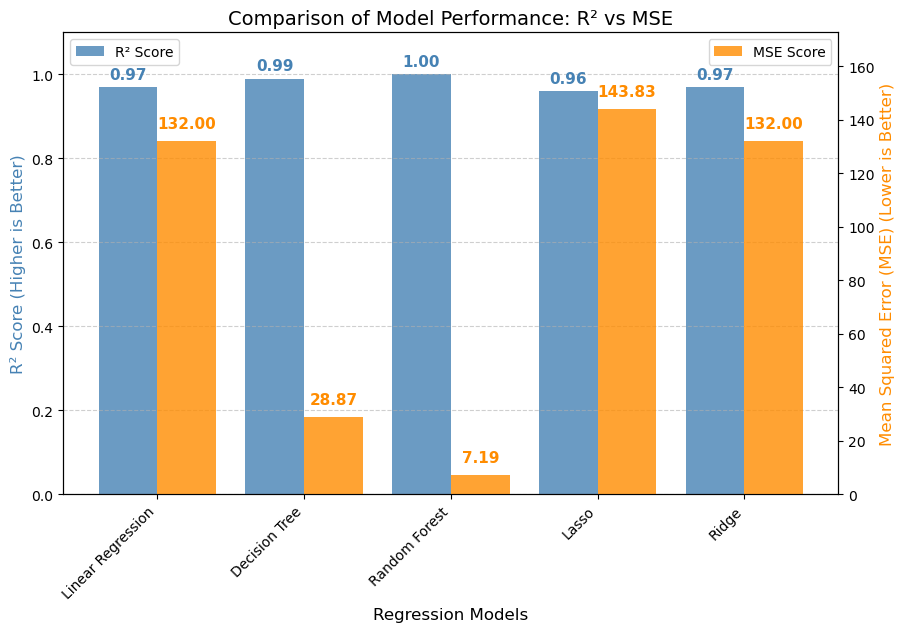

In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary of R² scores and MSE scores
r2_scores = {
    "Linear Regression": 0.97,
    "Decision Tree": 0.99,
    "Random Forest": 1.00,
    "Lasso": 0.96,
    "Ridge": 0.97
}

mse_scores = {
    "Linear Regression": 132.00,
    "Decision Tree": 28.87,
    "Random Forest": 7.19,
    "Lasso": 143.83,
    "Ridge": 132.00
}

# Define colors
colors_r2 = '#4682B4'  # Blue for R² scores
colors_mse = '#FF8C00'  # Orange for MSE scores

# Model names for X-axis
model_names = list(r2_scores.keys())

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# X locations for bars
x_indexes = np.arange(len(model_names))
bar_width = 0.4  # Adjust bar width for clarity

# Plot R² scores on primary Y-axis (Left)
bars1 = ax1.bar(x_indexes - bar_width/2, r2_scores.values(), width=bar_width, color=colors_r2, alpha=0.8, label="R² Score")

# Create secondary Y-axis (Right) for MSE scores
ax2 = ax1.twinx()
bars2 = ax2.bar(x_indexes + bar_width/2, mse_scores.values(), width=bar_width, color=colors_mse, alpha=0.8, label="MSE Score")

# Labels & Titles
ax1.set_xlabel("Regression Models", fontsize=12)
ax1.set_ylabel("R² Score (Higher is Better)", fontsize=12, color=colors_r2)
ax2.set_ylabel("Mean Squared Error (MSE) (Lower is Better)", fontsize=12, color=colors_mse)
plt.title("Comparison of Model Performance: R² vs MSE", fontsize=14)

# Annotate R² Scores
for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{bar.get_height():.2f}", ha='center', fontsize=11, fontweight='bold', color=colors_r2)

# Annotate MSE Scores
for bar in bars2:
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f"{bar.get_height():.2f}", ha='center', fontsize=11, fontweight='bold', color=colors_mse)

# Set Y-axis limits
ax1.set_ylim([0, 1.1])  # R² always ranges from 0 to 1
ax2.set_ylim([0, max(mse_scores.values()) * 1.2])  # Scale MSE dynamically

# X-axis adjustments
ax1.set_xticks(x_indexes)
ax1.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.show()


#### What This Graph Shows
##### Models with high R² (close to 1) and low MSE (small values) are the best.
##### Random Forest has the best performance (R² = 1.00, MSE = 7.19).
##### Linear & Ridge Regression have the same R² but different MSE.
##### Lasso performs the worst (highest MSE, lowest R²).

### Prediction on Test Data

#### Train the Random Forest Regression Model

In [222]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### Make Predictions on Test Data

In [223]:
test_data_prediction = model.predict(X_test)
print("Predictions:", test_data_prediction[:10])  # Show first 10 predictions


Predictions: [170.94 192.52  53.26 159.16 221.18 177.17  97.22  45.25  80.18  58.96]


In [224]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_data_prediction)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate R² Score
r2 = r2_score(y_test, test_data_prediction)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 7.2005
Root Mean Squared Error (RMSE): 2.6834
R² Score: 0.9982


##### Random Forest model is making excellent predictions. The R² score is very close to 1, indicating that the model captures nearly all 

##### the variance in the dataset. The RMSE is low, which means the model is making highly accurate predictions.



#### Feature Importance

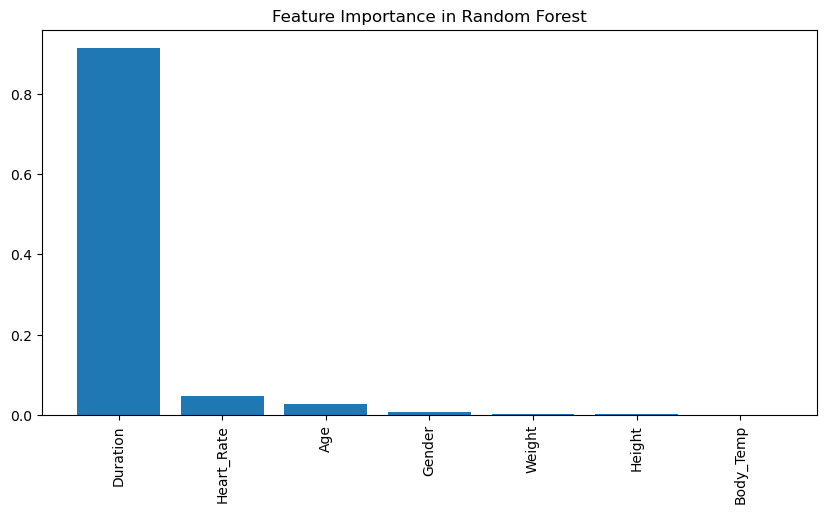

In [225]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = model.feature_importances_
feature_names = X_train.columns  # Ensure X_train is a DataFrame

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.show()


### Scatter Plot: Actual vs. Predicted Values

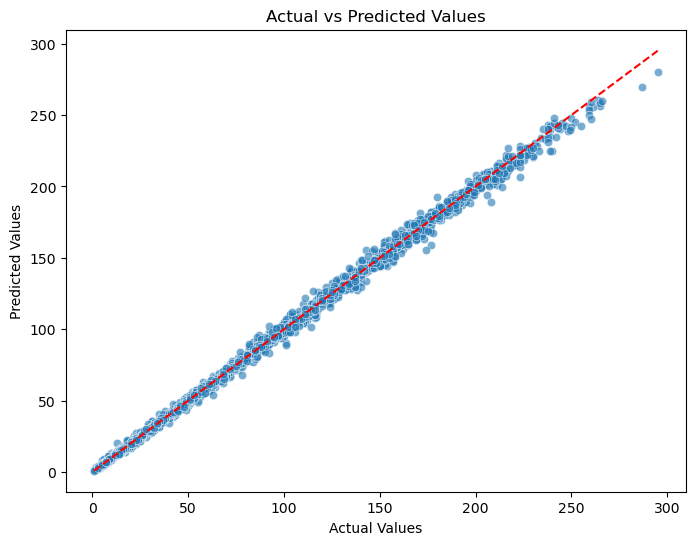

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=test_data_prediction, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # y = x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


##### What to look for?
##### If points are close to the red line, predictions are accurate.
##### If points deviate a lot, the model may have errors.¶

#### Random Forest Regression model is performing exceptionally well
##### Mean Squared Error (MSE) = 7.2005 → Low values are better. This means your average squared prediction error is quite small.
##### Root Mean Squared Error (RMSE) = 2.6834 → Since RMSE is in the same units as the target variable, it tells us that the average prediction error is around 2.68 units.
##### R² Score = 0.9982 → This means 99.82% of the variance in the target variable is explained by the model, which is extremely high.

###  Residual Plot (Errors in Prediction)

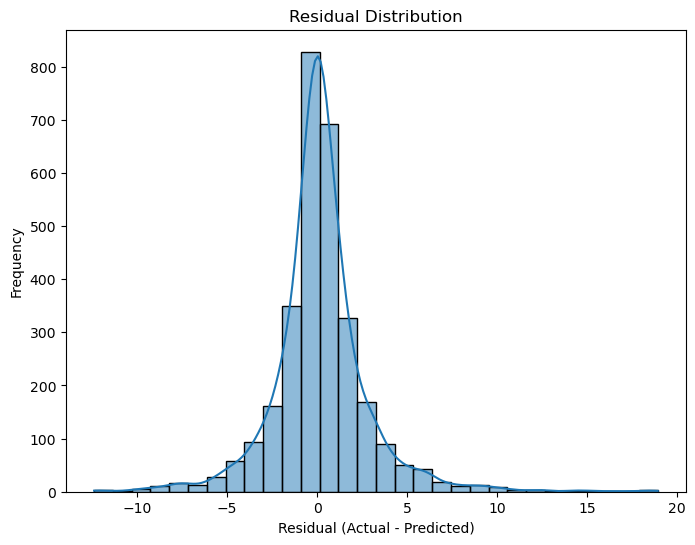

In [228]:
residuals = y_test - test_data_prediction

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


##### What to look for?
##### If residuals are normally distributed around zero, the model is good.

#### Selecting Model

In [229]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [232]:
import pickle

# Assuming 'model' is your trained RandomForestRegressor
with open('rfr.pkl', 'wb') as f:
    pickle.dump(model, f)

In [233]:
with open('rfr.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [235]:
X_train.to_csv('x_train.csv')